    CustomerID  Annual_Spend  Frequency  Recency
0            1          4174          2      274
1            2          4507         12       89
2            3          1860          6      316
3            4          2294          2       14
4            5          2130          1      242
5            6          2095         12      265
6            7          4772         12      346
7            8          4092         17       53
8            9          2638         10      340
9           10          3169         16       92
10          11          1466         15      264
11          12          2238         15       35
12          13          1330         19      206
13          14          2482         12       81
14          15          3135          3       50
15          16          4444          5      360
16          17          4171         19        2
17          18          3919          7       54
18          19          4735          9      106
19          20      

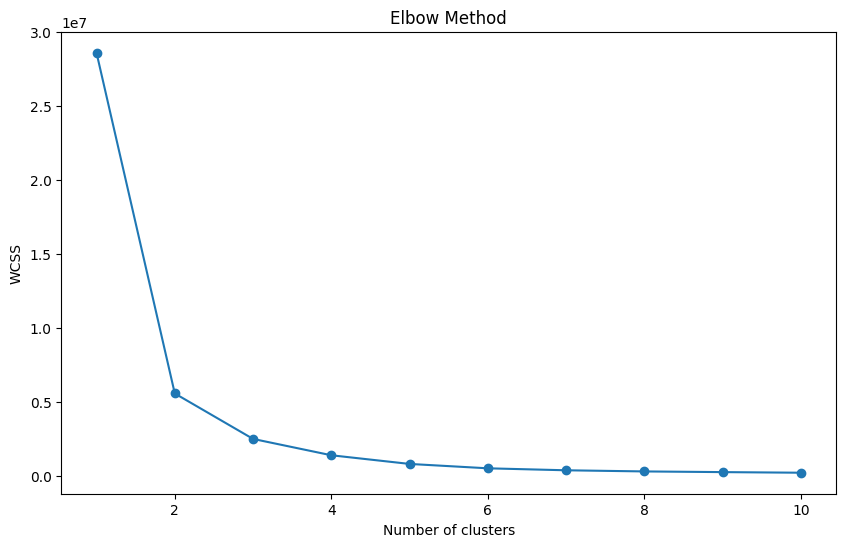

    CustomerID  Annual_Spend  Frequency  Recency  Cluster
0            1          4174          2      274        0
1            2          4507         12       89        0
2            3          1860          6      316        1
3            4          2294          2       14        2
4            5          2130          1      242        2
5            6          2095         12      265        2
6            7          4772         12      346        0
7            8          4092         17       53        0
8            9          2638         10      340        2
9           10          3169         16       92        2
10          11          1466         15      264        1
11          12          2238         15       35        2
12          13          1330         19      206        1
13          14          2482         12       81        2
14          15          3135          3       50        2
15          16          4444          5      360        0
16          17

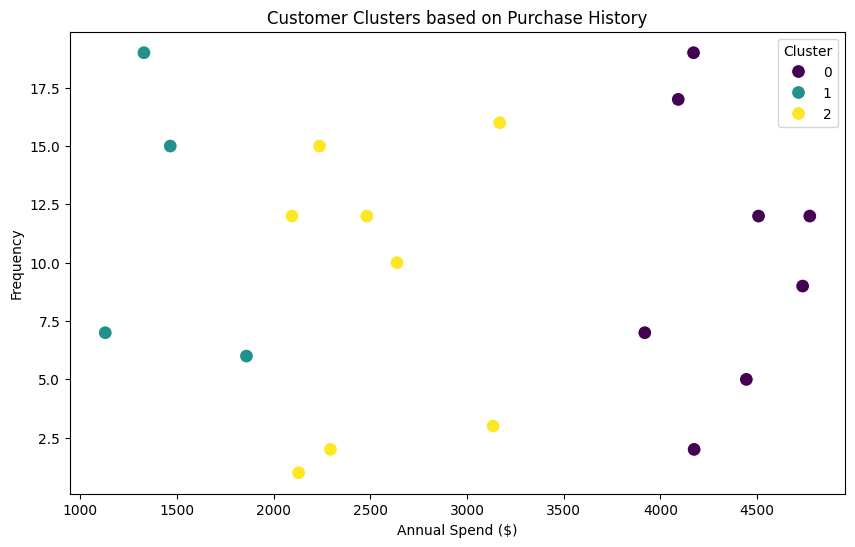

In [1]:
#Task 2: Customer Segmentation I used K-means clustering to segment customers of a retail store based on their purchase history, including frequency and total amount spent. This allows the store to tailor marketing strategies and product offerings to different customer groups.

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(42)
data = {
    'CustomerID': range(1, 21),
    'Annual_Spend': np.random.randint(1000, 5000, 20),
    'Frequency': np.random.randint(1, 20, 20),
    'Recency': np.random.randint(1, 365, 20)
}

df = pd.DataFrame(data)
print(df)

# Define the features for clustering
X = df[['Annual_Spend', 'Frequency', 'Recency']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the dataset
df['Cluster'] = y_kmeans
print(df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Spend', y='Frequency', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Clusters based on Purchase History')
plt.xlabel('Annual Spend ($)')
plt.ylabel('Frequency')
plt.show()